In [1]:
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

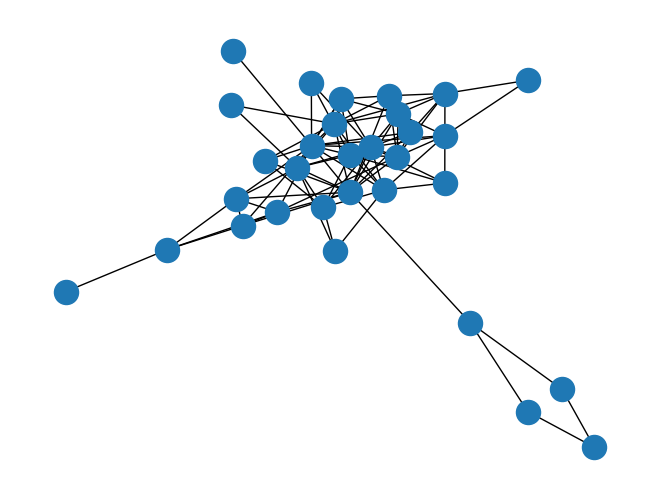

In [45]:
# file_path = '/home/donald/Downloads/ass2/Karate.txt'

Cervantes = "/home/donald/Downloads/ass2/Centrality.txt"
tortoise = "/home/donald/Downloads/ass2/Tortoise.txt"

G = nx.read_weighted_edgelist(tortoise)
plt.clf()
nx.draw(G)
plt.savefig("ass.png")
plt.show()
A=nx.to_numpy_array(G)

In [43]:
A

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1480, 1480))

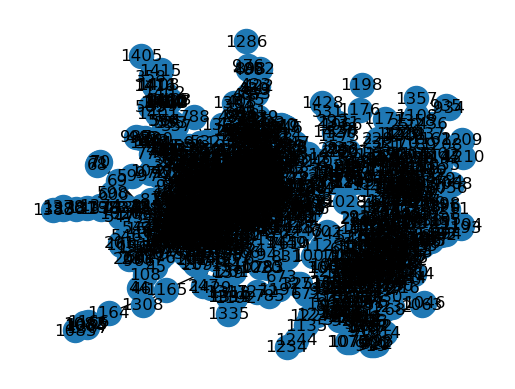

[ 1.  5.  1. ...  1.  1. 18.]


In [25]:
#Redraw network graph to order node labelling in adjacency matrix.
G = nx.from_numpy_array(A)
plt.clf()
pos = nx.spring_layout(G)
nx.draw_networkx(G)
#nx.draw_networkx_edges(G,pos)
plt.axis('off')
plt.savefig("pth2.png")
plt.show()
#Define some vector quantities
n = len(A)
e = np.ones(n)
k = np.dot(A,e)
print(k)

In [26]:
# Use the eigenvalues to calculate the number of triangles in G and also
# the number of closed walks of length 4 and 5.
u,v = lg.eigh(A)
print(sum(u**3)/6)
print(sum(u**4))
print(sum(u**5))

1795.9999999999957
582336.0000000012
4720540.000000014


In [27]:
u

array([-14.82976901, -12.84722324, -11.59298599, ...,  12.42623054,
        14.41414377,  21.71419999], shape=(1480,))

In [28]:
v[:,0]

array([ 1.40110625e-04, -2.07780820e-03,  3.84206375e-04, ...,
        2.35656608e-06,  2.35656608e-06, -2.89795027e-05], shape=(1480,))

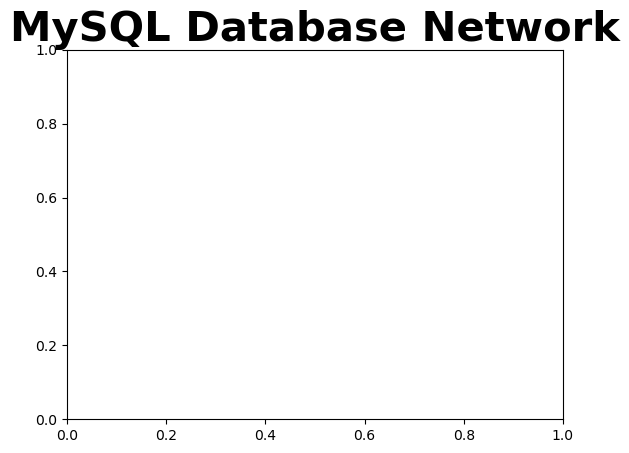

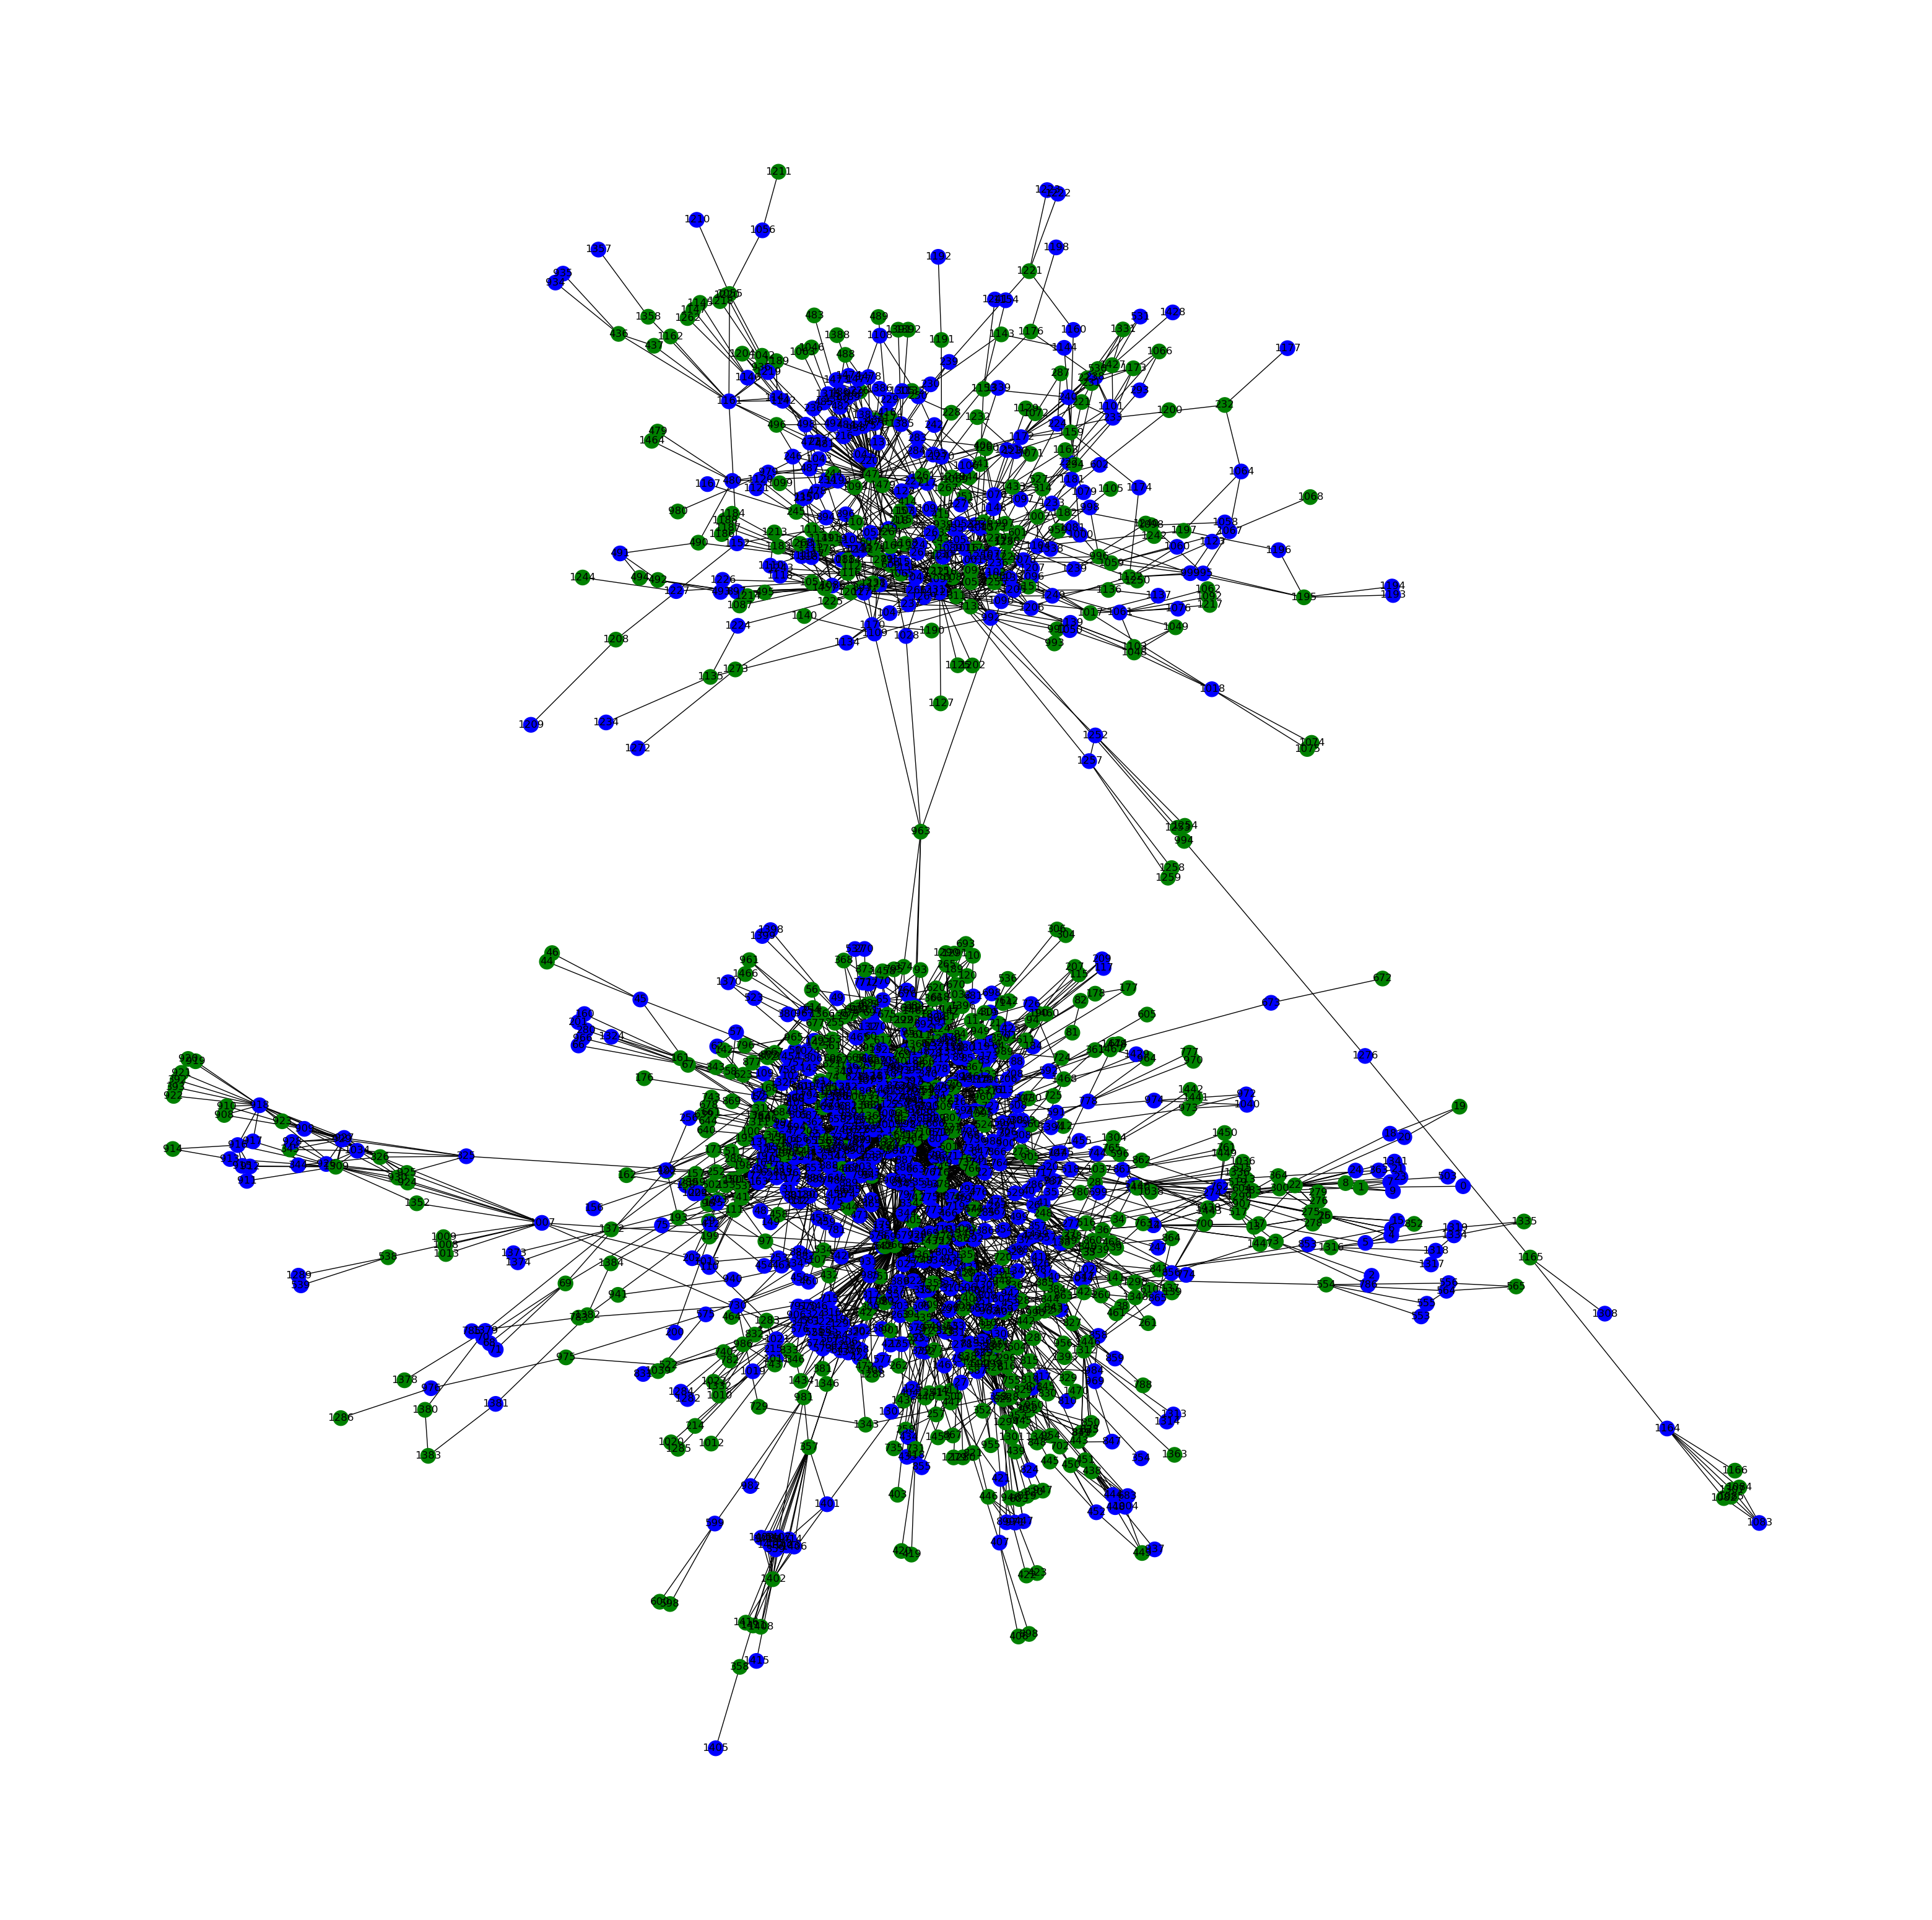

In [42]:
#  Use the eigenvector associated with the most negative eigenvalue) of A to
# determine a partition of G into almost bipartite form.
P=v[:,0] # Put eigenvector here
C1 = np.where(P>0)[0] # C1 is a vector of indices of P which are positive
C2 = np.where(P<=0)[0] # C2 is a vector of indices of P which are non-positive
colour = np.tile('g',n)  # Default colour is green
colour[C1] = 'b'  # Turn one partition blue
plt.clf()
plt.title("MySQL Database Network", fontsize=30, fontweight='bold')
plt.figure(figsize=(40, 40))  # Added very large figure size
nx.draw_networkx(G,pos,node_color = colour)
plt.axis('off')
plt.savefig('ass.png')
plt.show()


In [30]:
(np.sum(A[np.ix_(C1,C1)])+np.sum(A[np.ix_(C2,C2)]))/2

np.float64(1218.0)

In [31]:
np.sum(A[np.ix_(C1,C2)])

np.float64(2972.0)

In [32]:
np.sum(A)/2

np.float64(4190.0)

In [33]:
m = np.sum(A)/2
G2 = nx.erdos_renyi_graph(n,2*m/n/(n-1))
A2 = nx.to_numpy_array(G2)
np.sum(A2)/2

np.float64(4139.0)

In [34]:
A@A@A

array([[ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 5.,  4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ..., 15., 15.,  8.]], shape=(1480, 1480))

In [35]:
lg.trace(A@A@A)

np.float64(10776.0)

In [36]:
A2@A2@A2

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0., 10.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 10.,  0., ...,  0.,  0.,  0.]], shape=(1480, 1480))

In [37]:
lg.trace(A2@A2@A2)

np.float64(222.0)

In [38]:
lg.matrix_power(A,3)

array([[ 0.,  5.,  0., ...,  0.,  0.,  0.],
       [ 5.,  4.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ...,  0.,  0., 15.],
       [ 0.,  0.,  0., ..., 15., 15.,  8.]], shape=(1480, 1480))

In [39]:
np.matrix(A)**3

matrix([[ 0.,  5.,  0., ...,  0.,  0.,  0.],
        [ 5.,  4.,  1., ...,  0.,  0.,  0.],
        [ 0.,  1.,  0., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0., 15.],
        [ 0.,  0.,  0., ...,  0.,  0., 15.],
        [ 0.,  0.,  0., ..., 15., 15.,  8.]], shape=(1480, 1480))

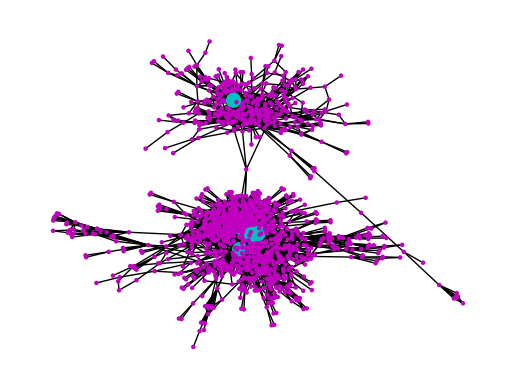

[ 126  566  745  737 1472]


In [40]:
nd = np.argsort(-k)[0:5]
colour = np.tile('m',n)
ns = np.ones(n)*5
colour[nd] = 'c'
ns[nd]=100
nx.draw_networkx(G,pos,node_color = colour,node_size=ns,with_labels=False)
plt.axis('off')
plt.show()
print(nd)